In [130]:
#CAPSTONE PROJECT 

In [131]:
#Predicting LEGO Set Popularity and Pricing Patterns Using Machine Learning

In [2]:
import pandas as pd
import itertools
import numpy as np
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold 
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import os
import zipfile
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
csv_file_path = '~/Downloads/LEGO Sets/sets.csv'  # Replace this with the actual path to your sets.csv file

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())

  Set_ID            Name  Year      Theme Theme_Group   Subtheme Category  \
0   75-1   PreSchool Set  1975  PreSchool  Pre-school        NaN   Normal   
1   77-1   PreSchool Set  1975  PreSchool  Pre-school        NaN   Normal   
2  077-1  Pre-School Set  1975      Duplo  Pre-school        NaN   Normal   
3   78-1   PreSchool Set  1975  PreSchool  Pre-school        NaN   Normal   
4   78-3       Basic Set  1975  Samsonite     Vintage  Basic set   Normal   

         Packaging  Num_Instructions     Availability  Pieces  Minifigures  \
0  {Not specified}                 0  {Not specified}    16.0          NaN   
1  {Not specified}                 0  {Not specified}    20.0          NaN   
2  {Not specified}                 0  {Not specified}    21.0          NaN   
3  {Not specified}                 0  {Not specified}    32.0          NaN   
4              Box                 0  {Not specified}   330.0          NaN   

   Owned  Rating  USD_MSRP  Total_Quantity  Current_Price  
0   10.0

In [3]:
#Above is the data set where current price was accuratley predicted
#here I am going to unzip and read two more data sets
# sets and theme from here I will start creating my own Dataframe

In [4]:
csv_file_path = '~/Downloads/SETS.csv'  # Replace this with the actual path to your sets.csv file

# Read the CSV file into a pandas DataFrame
LEGO = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(LEGO.head())

  set_num                        name  year  theme_id  num_parts
0    00-1             Weetabix Castle  1970       414        471
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          2
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12


In [5]:
csv_file_path = '~/Downloads/themes.csv'  # Replace this with the actual path to your sets.csv file

# Read the CSV file into a pandas DataFrame
theme = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(theme.head())

   id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0


In [14]:
""""my goal at this point is to find the right data sets with IDs so that
I can control the dimensionality of my data 
I want to use catagorical data for this like theme and color 
Additionally I will have binary vectors in mind for categorical variables such as """"

SyntaxError: unterminated string literal (detected at line 4) (2760935021.py, line 4)

In [ ]:
#PRICE PREDICTOR EDA 

In [6]:
df.dropna(inplace=True)

In [7]:
LEGO.dropna()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11669,WHITEHOUSE-1,Micro White House,2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28


In [8]:
#price prediction model with 90% accuracy  

#find target and predictor variables 
Xp = df[['Pieces','Minifigures','Rating','USD_MSRP']]
yp = df['Current_Price']

#train/split the data

Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.2, random_state=42)

In [9]:
#original price prediction model with 90% accuracy 
model2 = RandomForestRegressor()
model2.fit(Xp,yp)

RandomForestRegressor()

In [10]:
model2.score(Xp,yp)

0.8990989263542064

In [11]:
#eval model price predictor random forest regressor
#good with outliers
y_pred2 = model2.predict(Xp_train)
mse = mean_squared_error(yp_train, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(yp_train, y_pred2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 2033.49
Root Mean Squared Error (RMSE): 45.09
R-squared (R2) Score: 0.91


In [12]:
#eval model price predictor random forest regressor

y_pred2 = model2.predict(Xp_test)
mse = mean_squared_error(yp_test, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(yp_test, y_pred2)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 4970.09
Root Mean Squared Error (RMSE): 70.50
R-squared (R2) Score: 0.88


In [13]:
LEGO.columns

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')

In [14]:
LEGO.dropna()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11669,WHITEHOUSE-1,Micro White House,2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28


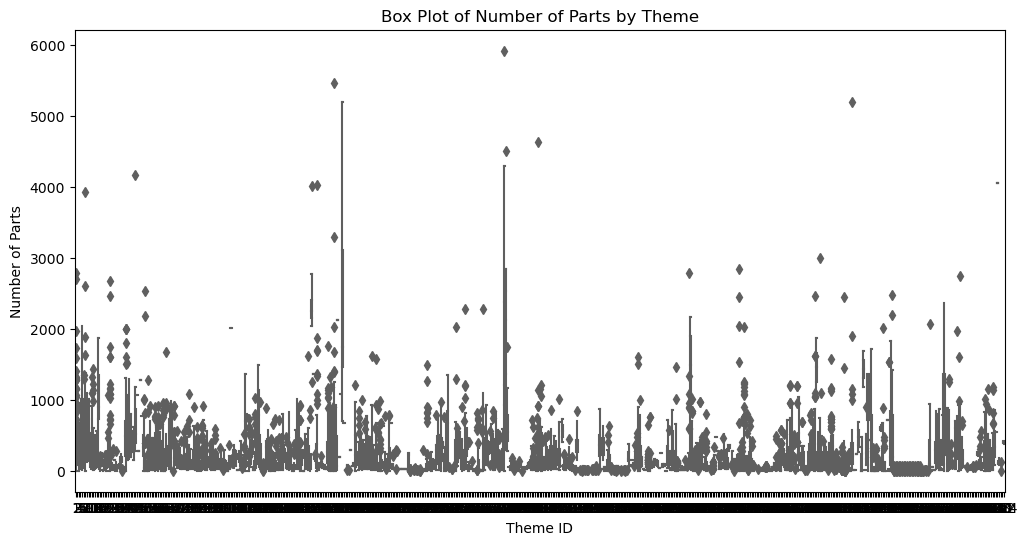

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='theme', y='num_parts', data=LEGO, palette='Set3')
plt.xlabel('Theme ID')
plt.ylabel('Number of Parts')
plt.title('Box Plot of Number of Parts by Theme')
plt.show()

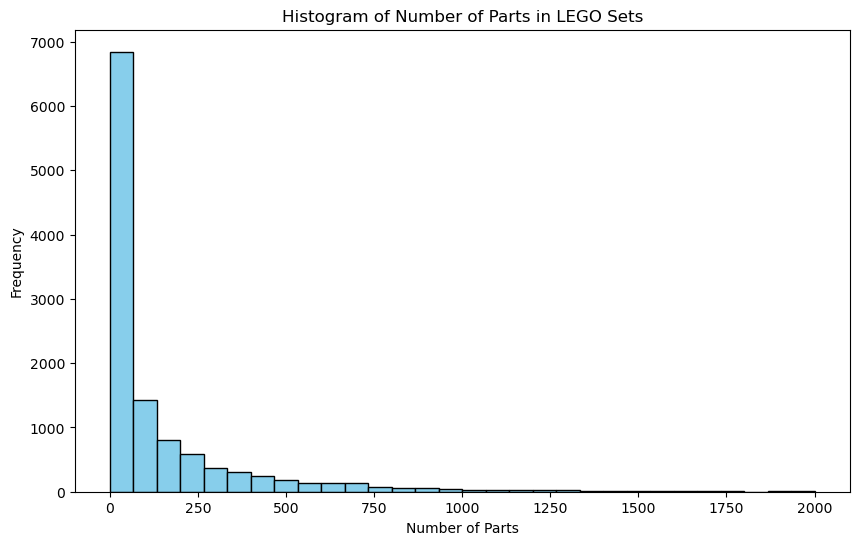

In [30]:

plt.figure(figsize=(10, 6))
plt.hist(LEGO['num_parts'], bins=30, range = (0,2000), color='skyblue', edgecolor='black')
plt.xlabel('Number of Parts')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Parts in LEGO Sets')
plt.show()

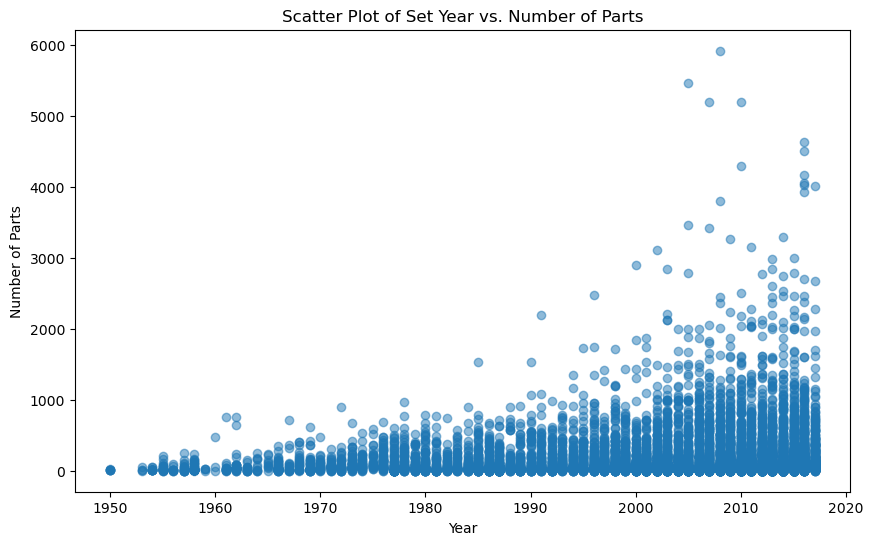

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(LEGO['year'], LEGO['num_parts'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Number of Parts')
plt.title('Scatter Plot of Set Year vs. Number of Parts')
plt.show()

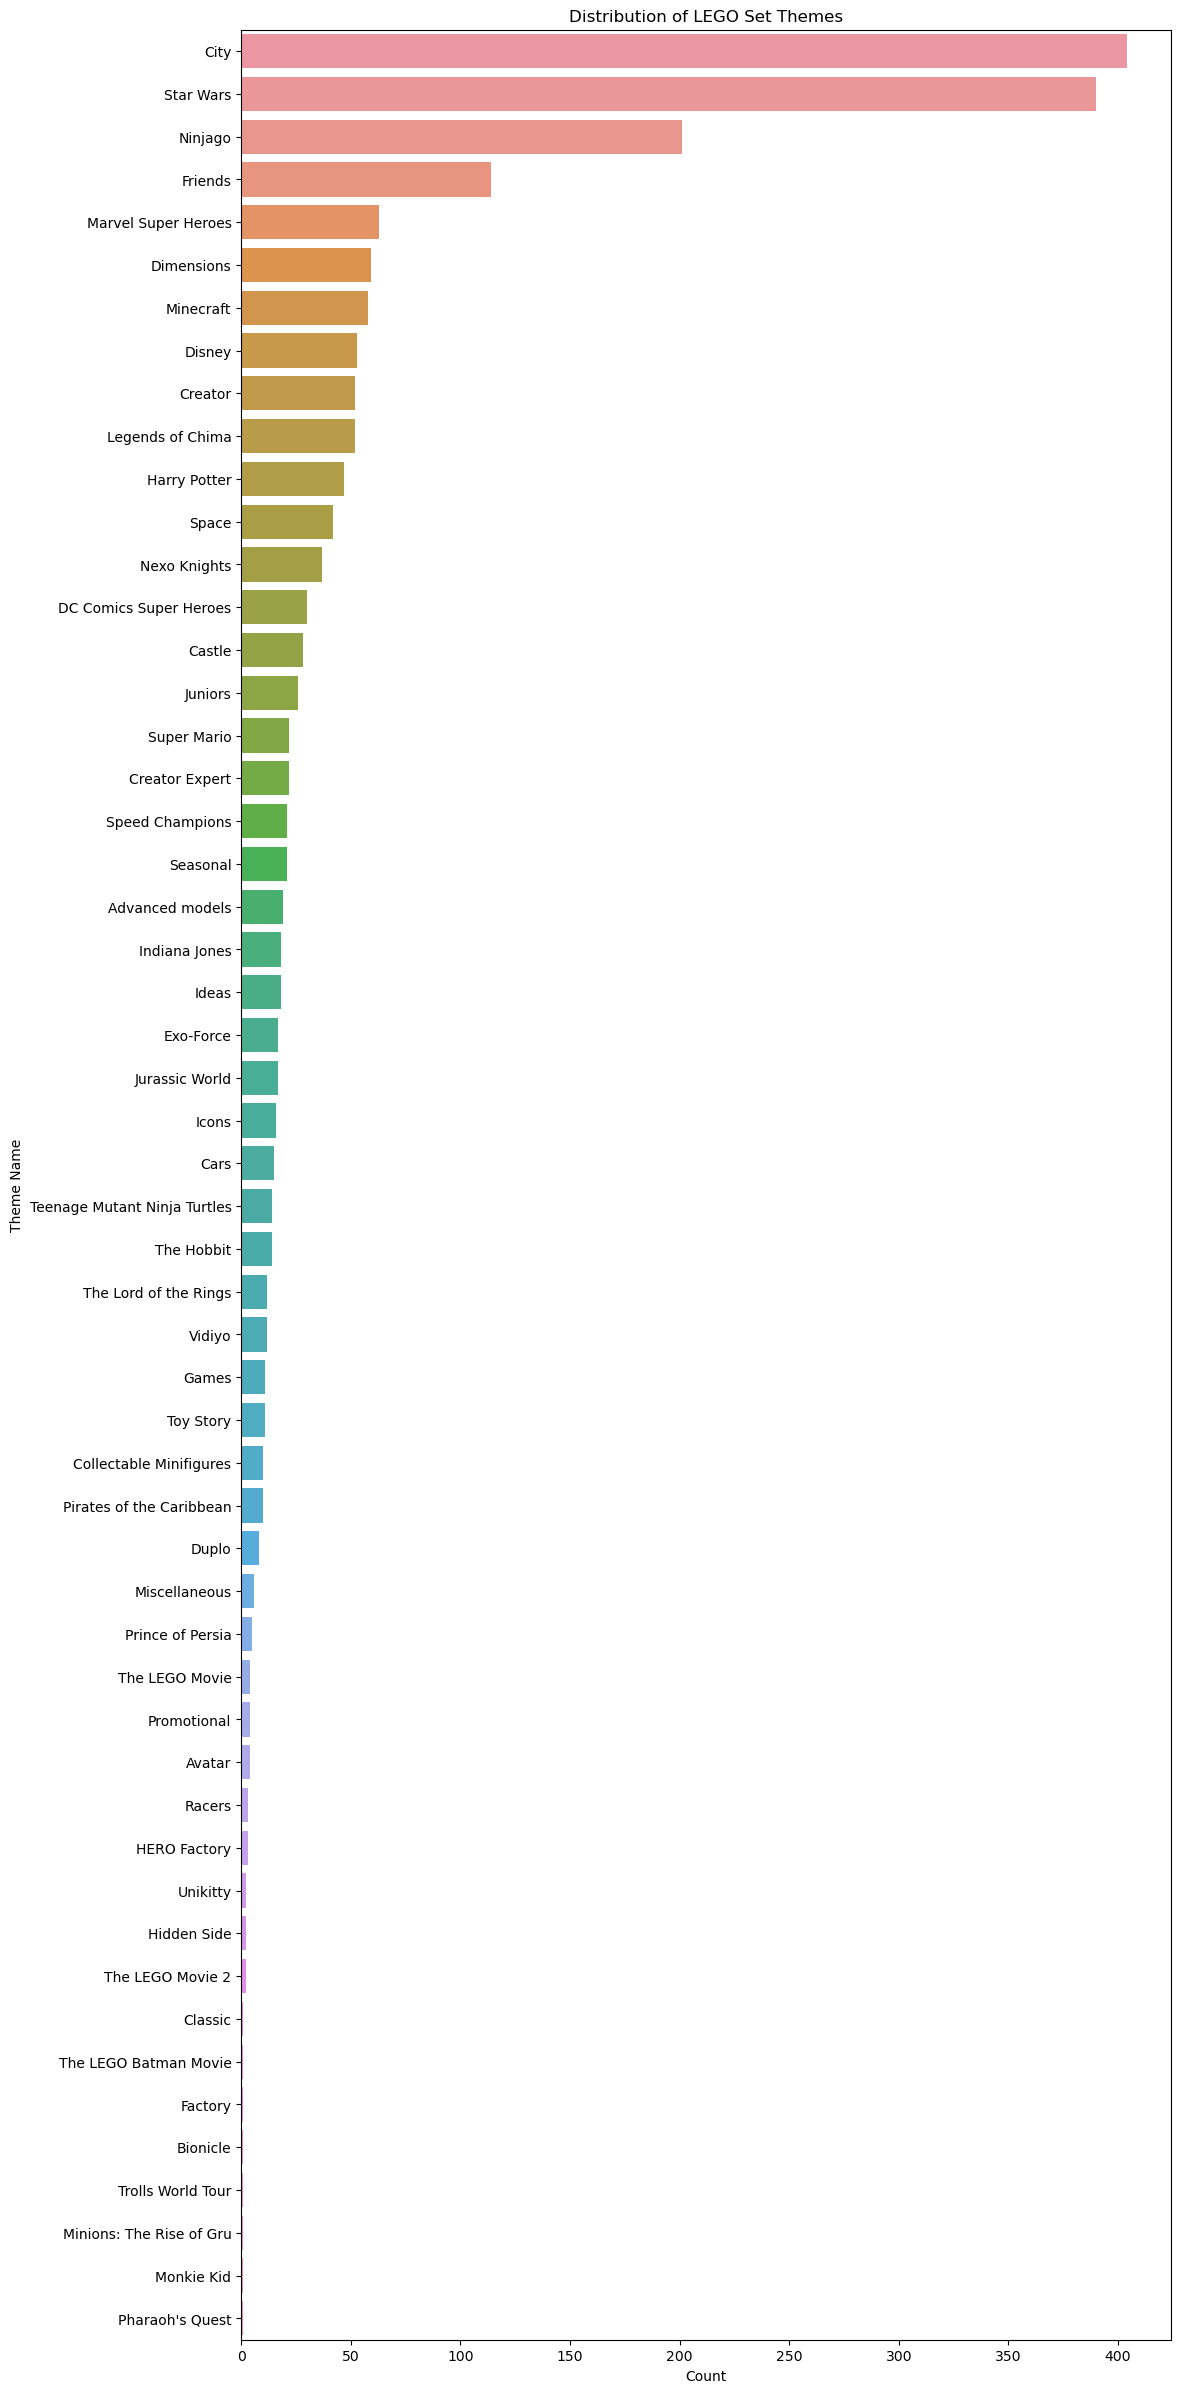

In [64]:
plt.figure(figsize=(12, 30))

sns.countplot(data=df, y='Theme', order=df['Theme'].value_counts().index)
plt.title('Distribution of LEGO Set Themes')
plt.xlabel('Count')
plt.ylabel('Theme Name')
plt.show()

In [35]:
#average rating for different themes
avg_rating_by_theme = df.groupby('Theme')['Rating'].mean().sort_values(ascending=False)

#print
print(avg_rating_by_theme)

Theme
Icons                           4.418750
Advanced models                 4.405263
Avatar                          4.350000
Ideas                           4.316667
Indiana Jones                   4.283333
The Lord of the Rings           4.241667
Creator Expert                  4.222727
Pirates of the Caribbean        4.130000
Castle                          4.125000
Speed Champions                 4.104762
Exo-Force                       4.076471
Duplo                           4.062500
Space                           4.052381
Harry Potter                    4.046809
Creator                         4.044231
Toy Story                       4.018182
The Hobbit                      4.007143
Minions: The Rise of Gru        4.000000
HERO Factory                    4.000000
Star Wars                       3.975385
Promotional                     3.975000
Collectable Minifigures         3.970000
Prince of Persia                3.960000
Ninjago                         3.947761
Minecraft 

In [15]:
# Remove rows with a rating of 0 so only sets with ratings are used for prediction 
df = df[df['Rating'] != 0]

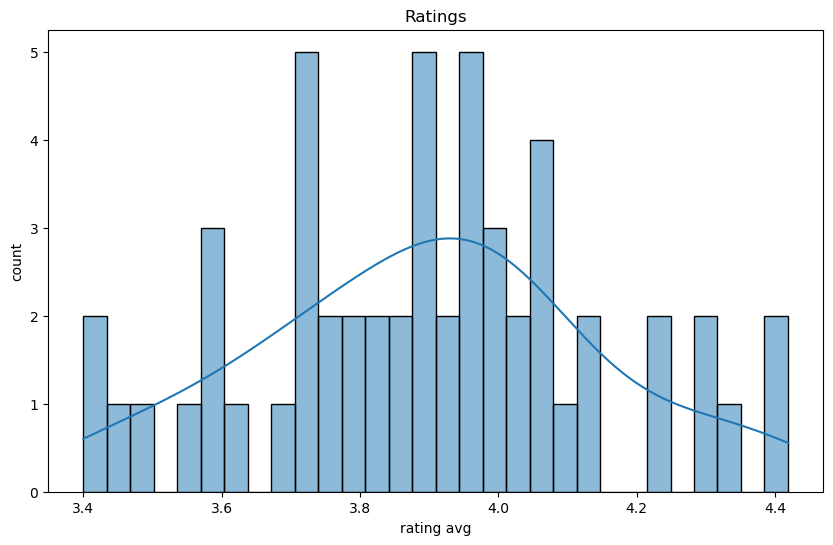

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=avg_rating_by_theme , bins=30, kde=True)
plt.title('Ratings')
plt.xlabel('rating avg')
plt.ylabel('count')
plt.show()

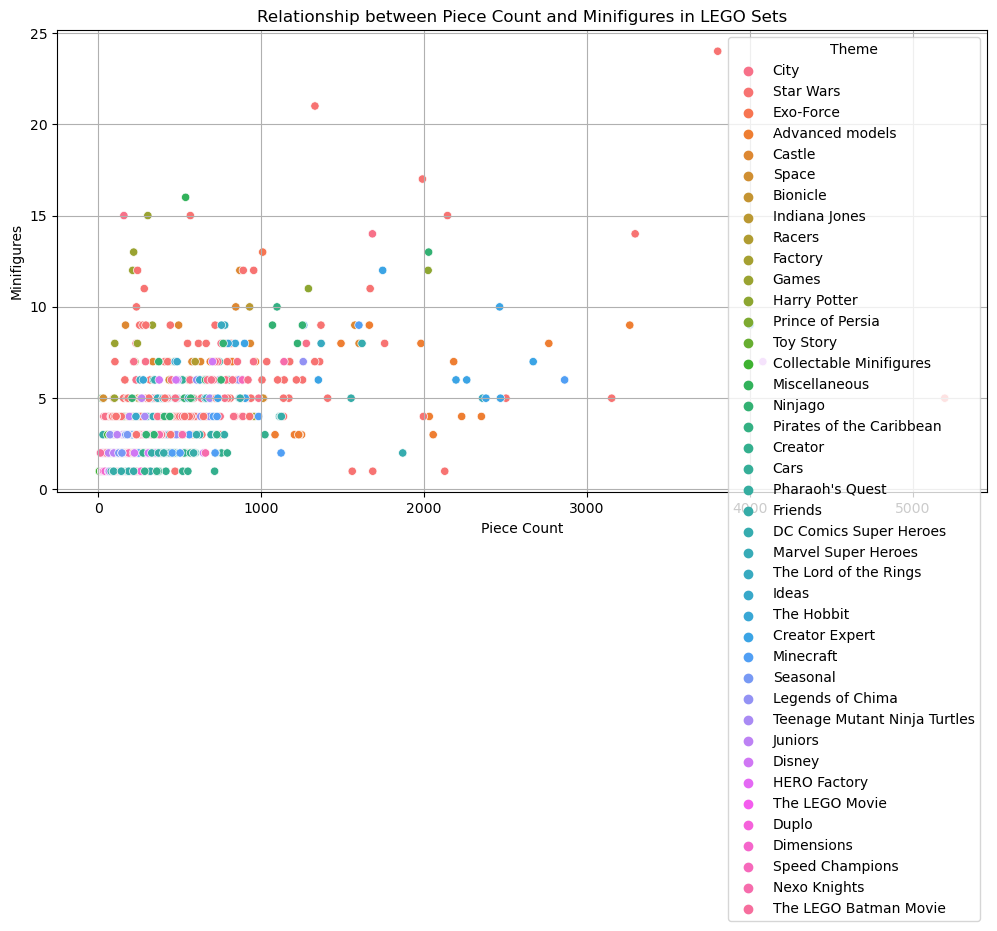

In [67]:
palette = sns.color_palette("husl", n_colors=len(LEGO_combined['Theme'].unique()))

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Pieces', y='Minifigures', hue='Theme', palette=palette, data=LEGO_combined)
plt.title('Relationship between Piece Count and Minifigures in LEGO Sets')
plt.xlabel('Piece Count')
plt.ylabel('Minifigures')
plt.legend(title='Theme', loc='best')
plt.grid(True)
plt.show()

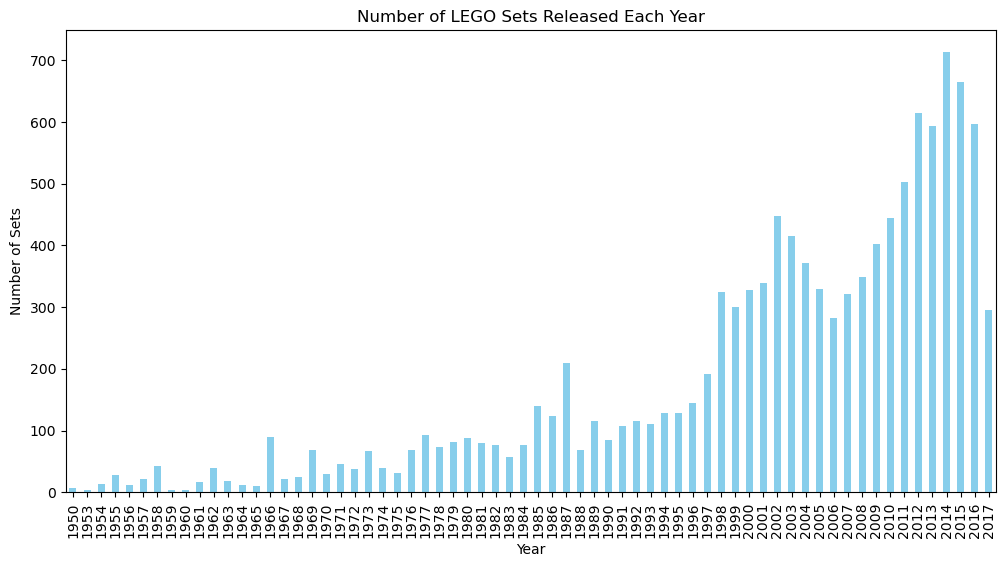

In [37]:
plt.figure(figsize=(12, 6))
LEGO['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.title('Number of LEGO Sets Released Each Year')
plt.show()

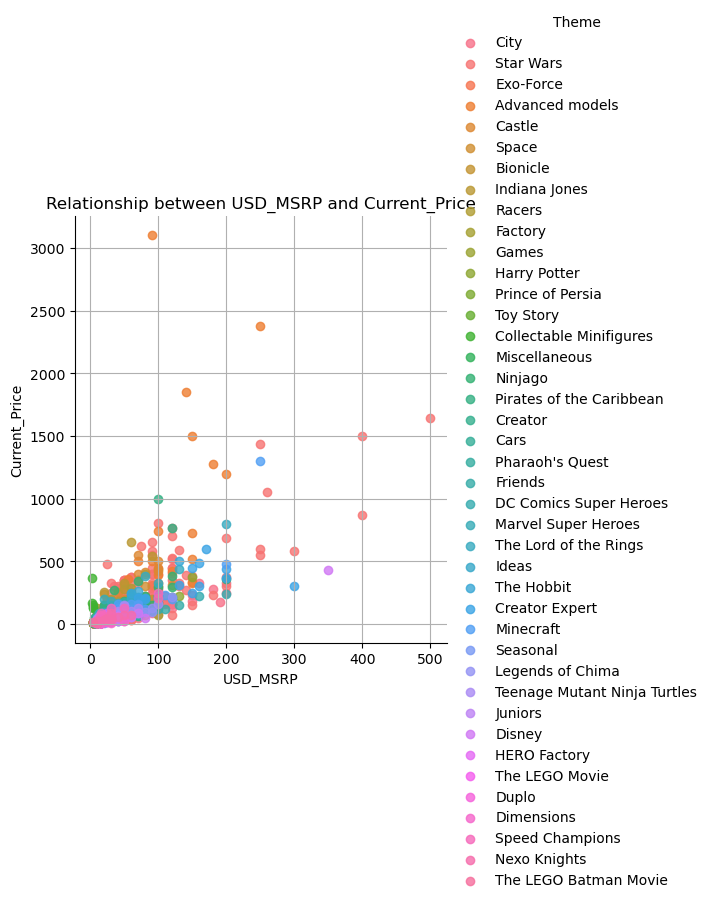

In [79]:
sns.lmplot(x='USD_MSRP', y='Current_Price', data=LEGO_combined, hue='Theme', fit_reg=False)
plt.title('Relationship between USD_MSRP and Current_Price')
plt.xlabel('USD_MSRP')
plt.ylabel('Current_Price')
plt.legend(title='Theme', loc='best')
plt.grid(True)
plt.gca().get_legend().remove()  # Remove the extra legend
plt.show()

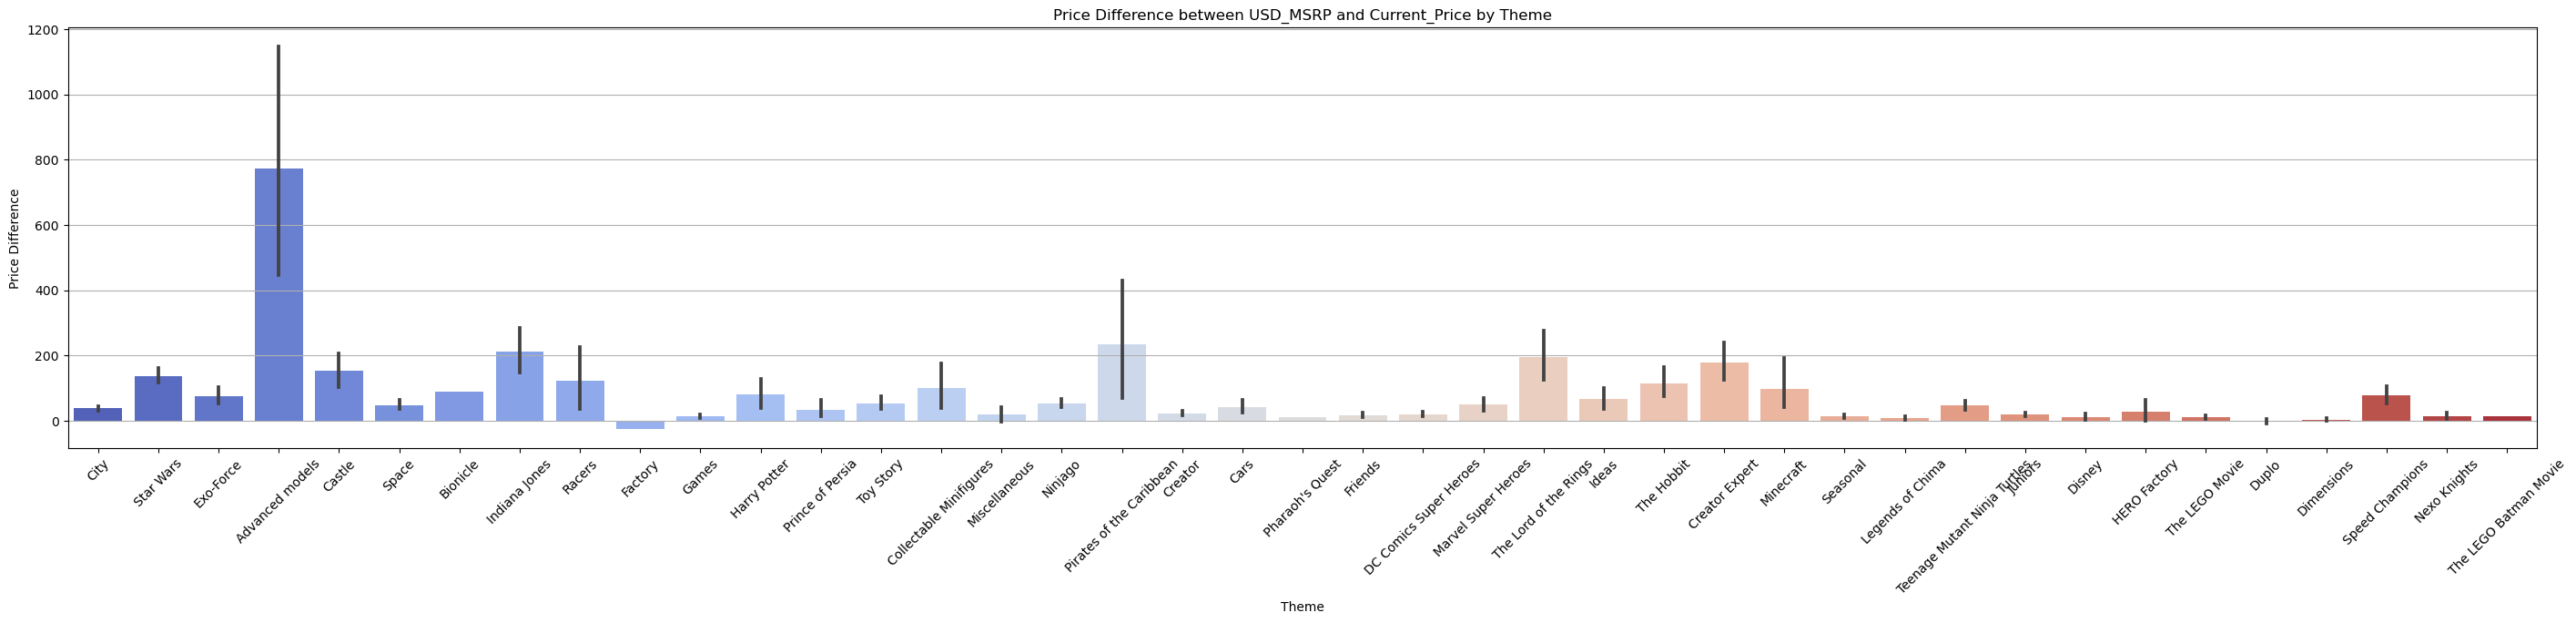

In [83]:
LEGO_combined['Price_Difference'] = LEGO_combined['Current_Price'] - LEGO_combined['USD_MSRP']

# Create a bar plot
plt.figure(figsize=(35, 6))
sns.barplot(x='Theme', y='Price_Difference', data=LEGO_combined, palette='coolwarm')
plt.title('Price Difference between USD_MSRP and Current_Price by Theme')
plt.xlabel('Theme')
plt.ylabel('Price Difference')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

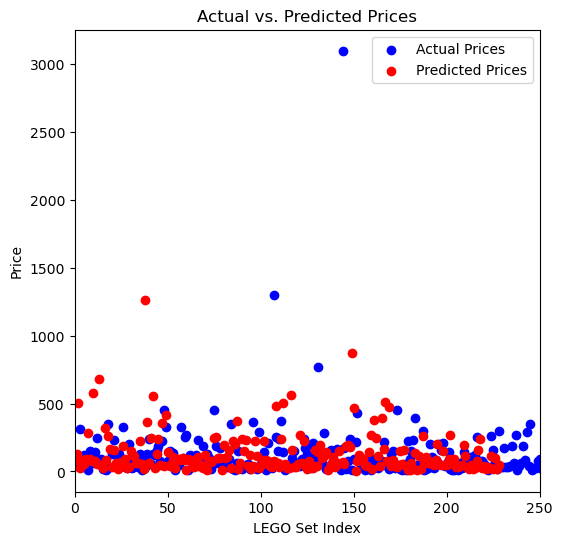

In [63]:
# Reset indexes of y_train and y_pred4
y_train_reset = y_train.reset_index(drop=True)
y_pred_reset = pd.Series(y_pred).reset_index(drop=True)

# Plot the actual prices versus the predicted prices
plt.figure(figsize=(6, 6))
plt.scatter(range(len(y_train_reset)), y_train_reset, color='blue', label='Actual Prices')
plt.scatter(range(len(y_pred_reset)), y_pred_reset, color='red', label='Predicted Prices')
plt.xlabel('LEGO Set Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.xlim(0,250)
plt.show()

In [87]:

# Split the combined dataset into training and testing sets
X = LEGO_combined[['Rating','theme_id', 'num_parts','year']]
y = LEGO_combined['Current_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
LEGO_combined

,set_num,name,year,theme_id,num_parts,Set_ID,Name,Year,Theme,Theme_Group,...,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,00-1,Weetabix Castle,1970.0,414.0,471.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0011-2,Town Mini-Figures,1978.0,84.0,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0011-3,Castle 2 for 1 Bonus Offer,1987.0,199.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0012-1,Space Mini-Figures,1979.0,143.0,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0013-1,Space Mini-Figures,1979.0,143.0,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,NaN,NaN,NaN,NaN,NaN,76917-1,2 Fast 2 Furious Nissan Skyline GT-R (R34),2023.0,Speed Champions,Licensed,...,Box,2.0,Retail,319.0,1.0,4755.0,4.4,24.99,43.0,14.640
14893,NaN,NaN,NaN,NaN,NaN,77012-1,Fighter Plane Chase,2023.0,Indiana Jones,Licensed,...,Box,2.0,Retail,387.0,3.0,1882.0,4.7,34.99,2.0,27.890
14894,NaN,NaN,NaN,NaN,NaN,77013-1,Escape from the Lost Tomb,2023.0,Indiana Jones,Licensed,...,Box,2.0,Retail,600.0,4.0,1721.0,4.5,39.99,4.0,33.100
14896,NaN,NaN,NaN,NaN,NaN,77015-1,Temple of the Golden Idol,2023.0,Indiana Jones,Licensed,...,Box,2.0,Retail,1545.0,5.0,1415.0,4.8,149.99,1.0,170.147


In [17]:
LEGO_combined = pd.concat([LEGO, df], axis=1)

In [78]:
LEGO_combined.corr()

C:\Users\Nolan\AppData\Local\Temp\ipykernel_3356\2391939656.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  LEGO_combined.corr()


,year,theme_id,num_parts,Year,Num_Instructions,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
year,1.000000,0.089147,0.116722,-0.026698,-0.072907,-0.093693,-0.036255,-0.050817,0.049646,-0.079656,-0.001625,-0.032160
theme_id,0.089147,1.000000,-0.133707,0.032848,-0.035441,-0.046265,-0.036730,-0.030276,0.025027,-0.038549,-0.033656,-0.023908
num_parts,0.116722,-0.133707,1.000000,-0.128141,-0.027636,0.019934,0.061728,0.100083,0.052819,0.030030,0.055092,0.027231
Year,-0.026698,0.032848,-0.128141,1.000000,0.147480,0.071401,-0.018212,-0.244122,-0.244009,0.085834,0.139683,-0.275121
Num_Instructions,-0.072907,-0.035441,-0.027636,0.147480,1.000000,0.439957,0.285379,0.019664,0.100522,0.465115,-0.033049,0.143411
Pieces,-0.093693,-0.046265,0.019934,0.071401,0.439957,1.000000,0.572756,0.178230,0.192277,0.938742,0.010192,0.588512
Minifigures,-0.036255,-0.036730,0.061728,-0.018212,0.285379,0.572756,1.000000,0.127601,0.165893,0.567662,0.012674,0.379953
Owned,-0.050817,-0.030276,0.100083,-0.244122,0.019664,0.178230,0.127601,1.000000,0.374114,0.123900,0.394093,0.159007
Rating,0.049646,0.025027,0.052819,-0.244009,0.100522,0.192277,0.165893,0.374114,1.000000,0.136321,0.120674,0.198856
USD_MSRP,-0.079656,-0.038549,0.030030,0.085834,0.465115,0.938742,0.567662,0.123900,0.136321,1.000000,-0.006678,0.587512


In [27]:
LEGO_combined.isna().sum()

set_num             0
name                0
year                0
theme_id            0
num_parts           0
Set_ID              0
Name                0
Year                0
Theme               0
Theme_Group         0
Subtheme            0
Category            0
Packaging           0
Num_Instructions    0
Availability        0
Pieces              0
Minifigures         0
Owned               0
Rating              0
USD_MSRP            0
Total_Quantity      0
Current_Price       0
dtype: int64

In [20]:
LEGO_combined.dropna(inplace=True)

In [29]:
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

In [30]:
model.score(X,y)

0.893891858056385

In [35]:
Xq = LEGO_combined[['USD_MSRP','theme_id', 'num_parts','year']]
yq = LEGO_combined['Rating']
Xq_train, Xq_test, yq_train, yq_test = train_test_split(Xq, yq, test_size=0.2, random_state=42)

In [39]:
model3 = RandomForestRegressor()
model3.fit(Xq,yq)

RandomForestRegressor()

In [84]:
model3.score(Xq,yq)

0.8983972513942834

In [40]:
model2.score(Xq,yq)

0.8976318574266428

In [47]:
Xo = LEGO_combined[['USD_MSRP','Num_Instructions','Pieces','Minifigures']]
yo = LEGO_combined['Rating']
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size=0.2, random_state=42)

In [50]:
model4 = RandomForestRegressor()
model4.fit(Xo,yo)

RandomForestRegressor()

In [51]:
model4.score(Xo,yo)

0.9014417703425566

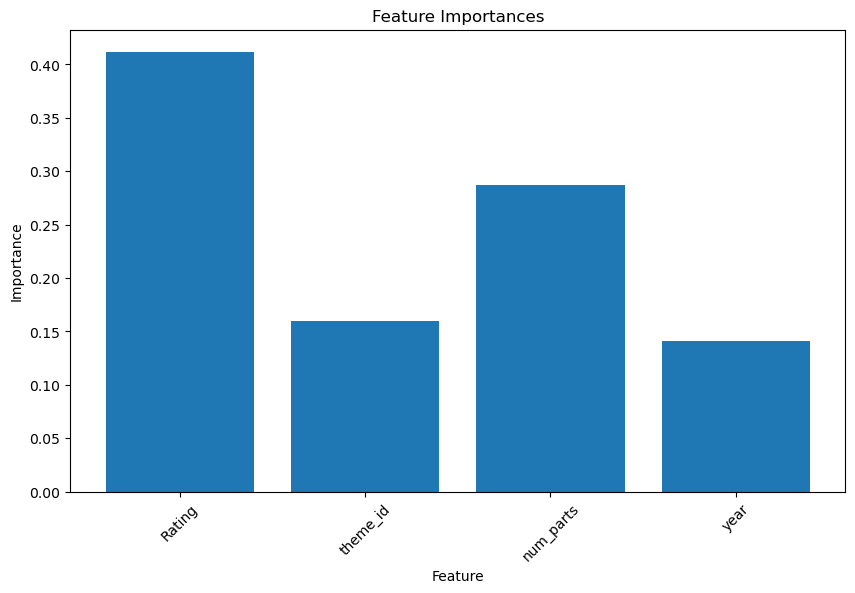

In [45]:
feature_importances = model.feature_importances_
features = X.columns  
#feature importance 
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

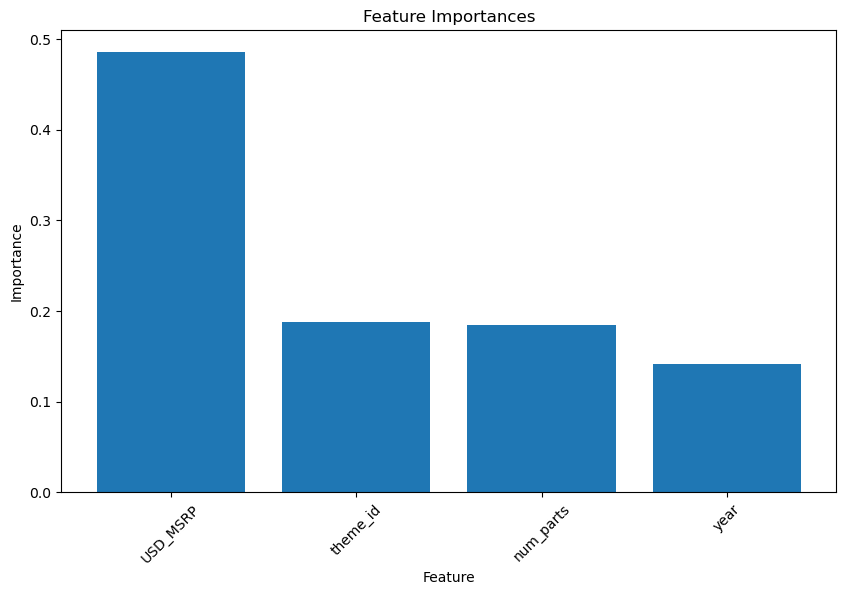

In [43]:
feature_importances = model3.feature_importances_
features = Xq.columns  

plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

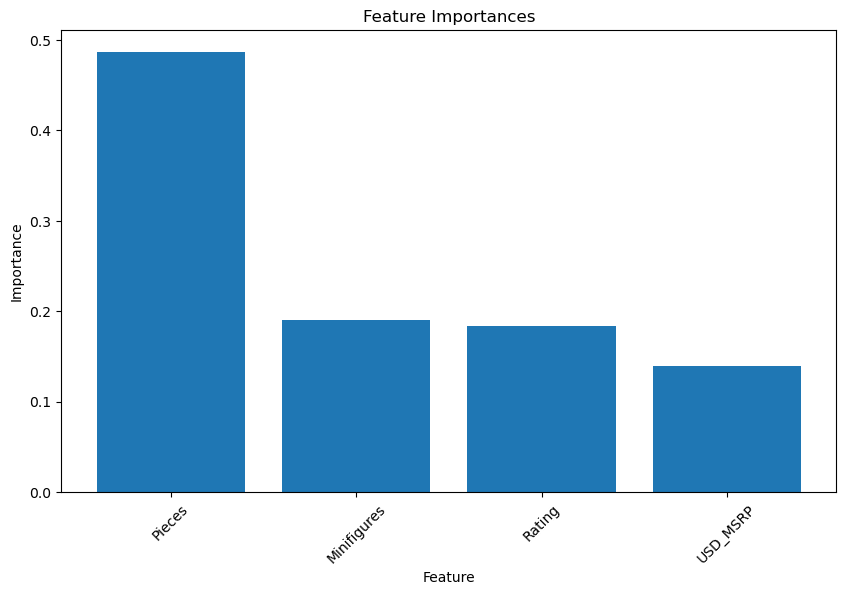

In [44]:
feature_importances = model2.feature_importances_
features = Xp.columns  
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

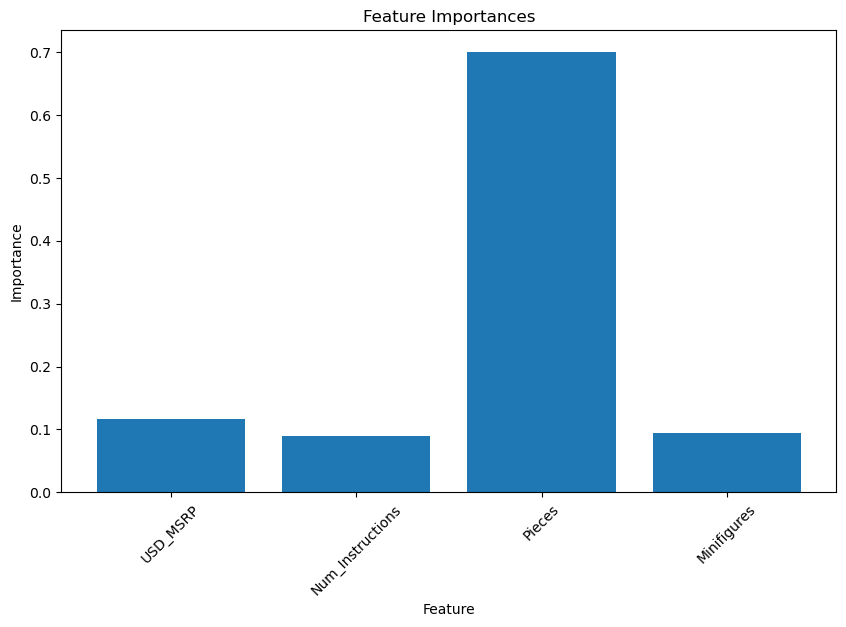

In [52]:
feature_importances = model4.feature_importances_
features = Xo.columns  # Assuming 'X' is your input data

plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

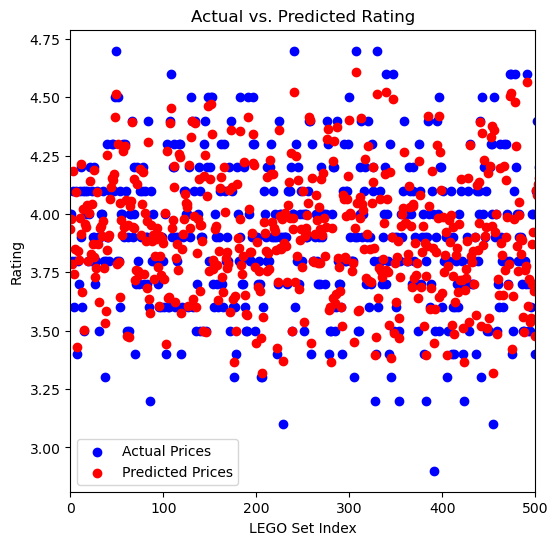

In [60]:
yq_train_reset = yq_train.reset_index(drop=True)
y_pred3_reset = pd.Series(y_pred3).reset_index(drop=True)

# Plot the actual prices versus the predicted prices
plt.figure(figsize=(6, 6))
plt.scatter(range(len(yq_train_reset)), yq_train_reset, color='blue', label='Actual Prices')
plt.scatter(range(len(y_pred3_reset)), y_pred3_reset, color='red', label='Predicted Prices')
plt.xlabel('LEGO Set Index')
plt.ylabel('Rating')
plt.title('Actual vs. Predicted Rating')
plt.legend()
plt.xlim(0,500)
plt.show()

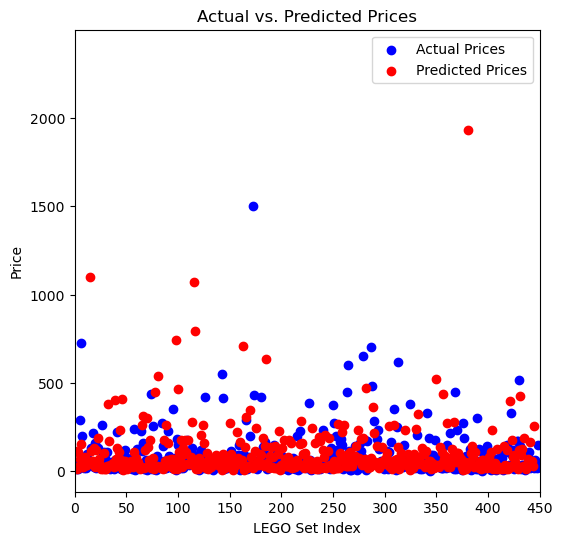

In [61]:
yp_train_reset = yp_train.reset_index(drop=True)
y_pred2_reset = pd.Series(y_pred2).reset_index(drop=True)

# Plot the actual prices versus the predicted prices
plt.figure(figsize=(6, 6))
plt.scatter(range(len(yp_train_reset)), yp_train_reset, color='blue', label='Actual Prices')
plt.scatter(range(len(y_pred2_reset)), y_pred2_reset, color='red', label='Predicted Prices')
plt.xlabel('LEGO Set Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.xlim(0,450)
plt.show()

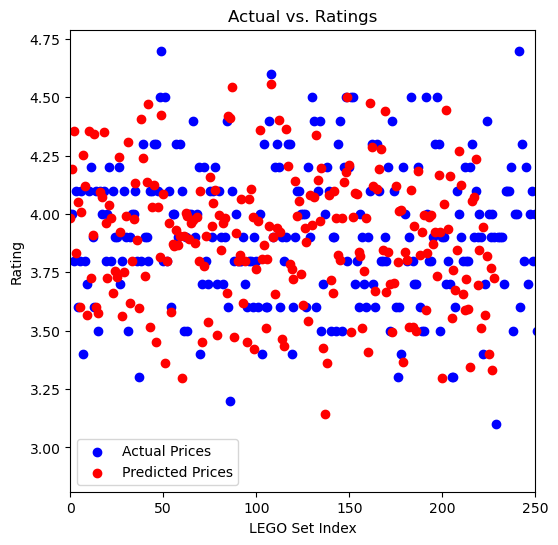

In [58]:
yo_train_reset = yo_train.reset_index(drop=True)
y_pred4_reset = pd.Series(y_pred4).reset_index(drop=True)
#plot or predicted v actual 
# Plot the actual prices versus the predicted prices
plt.figure(figsize=(6, 6))
plt.scatter(range(len(yo_train_reset)), yo_train_reset, color='blue', label='Actual Prices')
plt.scatter(range(len(y_pred4_reset)), y_pred4_reset, color='red', label='Predicted Prices')
plt.xlabel('LEGO Set Index')
plt.ylabel('Rating')
plt.title('Actual vs. Ratings')
plt.legend()
plt.xlim(0,250)
plt.show()

In [32]:
#eval model price predictor random forest regressor
#good with outliers
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 4497.02
Root Mean Squared Error (RMSE): 67.06
R-squared (R2) Score: 0.90


In [33]:
#eval model price predictor random forest regressor

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 4488.18
Root Mean Squared Error (RMSE): 66.99
R-squared (R2) Score: 0.87


In [41]:
#eval model price predictor random forest regressor

y_pred3 = model3.predict(Xq_train)
mse = mean_squared_error(yq_train, y_pred3)
rmse = np.sqrt(mse)
r2 = r2_score(yq_train, y_pred3)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10
R-squared (R2) Score: 0.90


In [42]:
#eval model price predictor random forest regressor
#this is the eval for model 3 for ratings predictions
y_pred3 = model3.predict(Xq_test)
mse = mean_squared_error(yq_test, y_pred3)
rmse = np.sqrt(mse)
r2 = r2_score(yq_test, y_pred3)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11
R-squared (R2) Score: 0.90


In [54]:
#eval model price predictor random forest regressor
#this is the train eval for model 4 for ratings predictions
y_pred4 = model4.predict(Xo_train)
mse = mean_squared_error(yo_train, y_pred4)
rmse = np.sqrt(mse)
r2 = r2_score(yo_train, y_pred4)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10
R-squared (R2) Score: 0.90


In [56]:
#eval model price predictor random forest regressor
#this is the test eval for Xo or model4 whic predicts ratings 
y_pred4 = model4.predict(Xo_test)
mse = mean_squared_error(yo_test, y_pred4)
rmse = np.sqrt(mse)
r2 = r2_score(yo_test, y_pred4)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11
R-squared (R2) Score: 0.90


In [86]:
#Train,test,split for model finding current price with optimal features 
Xf = LEGO_combined[['Rating','USD_MSRP', 'Pieces','year']]
yf = LEGO_combined['Current_Price']
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.2, random_state=42)

In [91]:
model5 = RandomForestRegressor()
model5.fit(Xf,yf)

RandomForestRegressor()

In [92]:
#model 5 is generating score for the final price model with optimal features 
model5.score(Xf,yf)

0.9312113301538503

In [102]:
# final rating model were the best features were chosen to increase accuracy 
Xr = LEGO_combined[['USD_MSRP','Current_Price', 'Pieces','year']]
yr = LEGO_combined['Rating']
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

In [103]:
#model 6 model creation
model6 = RandomForestRegressor()
model6.fit(Xr,yr)

RandomForestRegressor()

In [104]:
#model 6 score
model6.score(Xr,yr)

0.9269540057391606

In [105]:
#pricing final model eval
y_pred5 = model5.predict(Xf_train)
mse = mean_squared_error(yf_train, y_pred5)
rmse = np.sqrt(mse)
r2 = r2_score(yf_train, y_pred5)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 2815.97
Root Mean Squared Error (RMSE): 53.07
R-squared (R2) Score: 0.94


In [106]:
#eval for priving test final model
y_pred5 = model5.predict(Xf_test)
mse = mean_squared_error(yf_test, y_pred5)
rmse = np.sqrt(mse)
r2 = r2_score(yf_test, y_pred5)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 3307.22
Root Mean Squared Error (RMSE): 57.51
R-squared (R2) Score: 0.90


In [108]:
#final ratings eval train
y_pred6 = model6.predict(Xr_train)
mse = mean_squared_error(yr_train, y_pred6)
rmse = np.sqrt(mse)
r2 = r2_score(yr_train, y_pred6)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.08
R-squared (R2) Score: 0.93


In [109]:
#final ratings model eval for test 
y_pred6 = model6.predict(Xr_test)
mse = mean_squared_error(yr_test, y_pred6)
rmse = np.sqrt(mse)
r2 = r2_score(yr_test, y_pred6)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10
R-squared (R2) Score: 0.92


In [116]:
#pipeline creation for pricing final model
#the mean squared error of this is uite high which leads me to believe the wode range of lego sets might be playing a part 
k_values = [2]

for k in k_values:
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('feature_selector', SelectKBest(k=k)),
        ('regressor', RandomForestRegressor())
    ])

    # Fit the pipeline on the training data
    pipeline.fit(Xf_train, yf_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xf_test)

    # Evaluate the model
    mse = mean_squared_error(yf_test, y_pred)
    print(f"Mean Squared Error (k={k}):", mse)

Mean Squared Error (k=2): 29572.966206681715


In [113]:
# pipeline for rating final 
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('feature_selector', SelectKBest(k=2)),
    ('regressor', RandomForestRegressor())
])

# Fit the pipeline on the training data
pipeline.fit(Xr_train, yr_train)

# Make predictions on the test data
y_pred6 = pipeline.predict(Xr_test)

# Evaluate the model
mse = mean_squared_error(yr_test, y_pred6)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.09894052053650705
